In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error as unkind_squared_error, r2_score
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from numbers import Number


fifa_file = pd.read_csv('fifa21_train.csv') 
# dropped_joined_loan_date = False
# dropped_id_name = False
# dropped_other_cols = False

###
### Exploring

In [2]:
fifa_file.shape

(11701, 101)

In [3]:
pd.set_option('max_columns',150)
fifa_file.head()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [4]:
pd.set_option('display.max_rows', None)
display(fifa_file.describe().T)
pd.set_option('display.max_rows', 10)

,count,mean,std,min,25%,50%,75%,max
ID,11701.0,219436.649004,37480.006004,27.0,204060.0,229040.0,244176.0,259090.0
Age,11701.0,25.270490,4.957640,16.0,21.0,25.0,29.0,43.0
Growth,11701.0,5.534655,5.810903,-1.0,0.0,4.0,10.0,26.0
Attacking,11701.0,258.482181,72.267012,33.0,232.0,271.0,306.0,437.0
Crossing,11701.0,51.593795,17.872747,6.0,41.0,56.0,65.0,94.0
Finishing,11701.0,48.048116,19.399617,3.0,33.0,52.0,64.0,95.0
Heading Accuracy,11701.0,53.494060,16.956195,5.0,46.0,56.0,65.0,93.0
Short Passing,11701.0,60.436800,13.971811,8.0,56.0,63.0,69.0,94.0
Volleys,11660.0,45.067324,17.732902,4.0,32.0,47.0,59.0,90.0
Skill,11701.0,266.497222,76.835287,43.0,232.0,279.0,319.0,470.0


In [5]:
# check = clean_df[['w/f','sm','ir','a/w','d/w']]
# check.head()

# check.nunique()

# check['d/w'].unique()

# w/f values : ['4 ★', '3 ★', '2 ★', '5 ★', '1 ★']
# sm : ['2★', '4★', '3★', '1★', '5★']
# ir: ['1 ★', '2 ★', '3 ★', '5 ★', '4 ★']
# a/w: ['High', 'Medium', 'Low', nan]
# d/w: ['Medium', 'Low', 'High', nan]

#### Check nulls

In [6]:
summary = pd.concat([fifa_file.isna().sum(), round(fifa_file.isna().sum()/len(fifa_file),4)*100 ],axis=1)
summary = summary.set_axis(['Null Volumes','Null %'], axis=1)
summary
pd.set_option('display.max_rows', None)
display(summary[summary['Null Volumes']>0])
pd.set_option('display.max_rows', 20)

# drop loan_date_end
summary[summary['Null Volumes']>0].index

,Null Volumes,Null %
Club,18,0.15
Position,288,2.46
Joined,41,0.35
Loan Date End,11072,94.62
Volleys,41,0.35
Curve,41,0.35
Agility,41,0.35
Balance,41,0.35
Jumping,41,0.35
Interceptions,7,0.06


Index(['Club', 'Position', 'Joined', 'Loan Date End', 'Volleys', 'Curve',
       'Agility', 'Balance', 'Jumping', 'Interceptions', 'Positioning',
       'Vision', 'Composure', 'Sliding Tackle', 'A/W', 'D/W'],
      dtype='object')

###
### Preprocessing Functions

In [7]:
def prep_headings(my_df, columns_that_should_be_dates):
    # remove Unnamed: 0
    # my_df = my_df.drop(columns=['Unnamed: 0'])

    # drop to lower case
    my_df.columns = list(map(lambda x:x.lower(),my_df.columns))

    # replace spaces with _
    my_df.columns = list(map(lambda x:x.replace(' ','_'),my_df.columns))

    # set 'effective_to_date' to date type
    my_df[columns_that_should_be_dates] = pd.to_datetime(my_df[columns_that_should_be_dates])
    
    return my_df

def height_to_cm(height_in_feet):
    height_in_feet = height_in_feet.replace('"','') # remove the " symbol
    split_string = height_in_feet.split("'",1) # split the string on the ' symbol
    height_in_inchest = float(split_string[0]) * 12
    height_in_inchest += float(split_string[1])
    height_in_cm = round(height_in_inchest * 2.54,1) # not really needed but go metric
    return height_in_cm

def show_me_the_money(money_string):
    
    money_string = money_string[1:]
    unit = money_string[-1]
    
    if unit == '0':
        return int(money_string)
    else:
        money_string = float(money_string[:-1])
    
    if unit == 'K':
        money_string = money_string * 1000
    elif unit == 'M':
        money_string = money_string * 1000000
    elif unit == 'B':
        money_string = money_string * 1000000000
        
    return int(money_string)


def to_units(x):
    
    unit = x[-1]
    
    if unit in ['0','1','2','3','4','5','6','7','8','9']:
        return int(x)
    else:
        x = float(x[:-1])
    
    if unit == 'K':
        x = x * 1000
    elif unit == 'M':
        x = x * 1000000
    elif unit == 'B':
        x = x * 1000000000
        
    return int(x)

def score(text):
      
    if "+" in text:
        test = text.split('+',1)
        score = float(test[0])
        return score
    else:
        return text

      
def add_score(text):

    if "+" in text:
        test = text.split('+',1)
        score = float(test[0]) + float(test[1])
        return score
    else:
        return text


###
### Preprocessing

In [8]:
def preprocessing(dirty_data):

    global dropped_joined_loan_date
    global dropped_id_name
    global dropped_other_cols
    
    dirty_data = prep_headings(dirty_data, 'joined') # not sure if this will handle joined correctly


    dirty_data['height'] = dirty_data['height'].apply(height_to_cm)

    dirty_data['weight'] = list(map(lambda x:int(x.strip('lbs')),dirty_data['weight']))  # strip lbs and convert to int

    for col in ['value','wage','release_clause']:
        dirty_data[col] = dirty_data[col].apply(show_me_the_money)

    dirty_data['hits'] = dirty_data['hits'].apply(to_units)

    wf_dic = {'4 ★' : 4, '3 ★' : 3, '2 ★' : 2, '5 ★' : 5, '1 ★' :1}
    sm_dic = {'4★' : 4, '3★' : 3, '2★' : 2, '5★' : 5, '1★' :1}
    ir_dic = {'4 ★' : 4, '3 ★' : 3, '2 ★' : 2, '5 ★' : 5, '1 ★' :1}
    aw_dic = {'High' : 3, 'Medium' : 2, 'Low' : 1}
    dw_dic = {'High' : 3, 'Medium' : 2, 'Low' : 1}

    dirty_data['w/f'] = dirty_data['w/f'].map(wf_dic)
    dirty_data['sm'] = dirty_data['sm'].map(sm_dic)
    dirty_data['ir'] = dirty_data['ir'].map(ir_dic)
    dirty_data['a/w'] = dirty_data['a/w'].map(aw_dic)
    dirty_data['d/w'] = dirty_data['d/w'].map(dw_dic)

    #dirty_data['a/w'] = pd.to_numeric(dirty_data['a/w'])
    #dirty_data['d/w'] = pd.to_numeric(dirty_data['d/w'])
    
    # dropping columns that have pretty unique values & not sure best way to handled days...consider converting to number for model testing?
    if dropped_joined_loan_date == False:
        dirty_data = dirty_data.drop(['joined','loan_date_end'],axis=1)
        dropped_joined_loan_date = True
    
    # Deciding which categoricals to keep

    # dropping columns that have unique values
    if dropped_id_name == False:
        dirty_data = dirty_data.drop(['id','name'],axis=1)       
        dropped_id_name = True

    # dropping columns with many categorical values....for now
    if dropped_other_cols == False:
        dirty_data = dirty_data.drop(['nationality','club','position','team_&_contract','contract'],axis=1)
        dropped_other_cols = True
        
        
    # handle nulls
    
    #dirty_data['club'] = dirty_data['club'].fillna("Unknown")
    #dirty_data['position'] = dirty_data['position'].fillna("Unknown")
    
    summary = pd.concat([dirty_data.isna().sum(), round(dirty_data.isna().sum()/len(dirty_data),4)*100 ],axis=1)
    summary = summary.set_axis(['Null Volumes','Null %'], axis=1)
    
    # drop loan_date_end
    summary[summary['Null Volumes']>0].index
    
    #print(summary[summary['Null Volumes']>0].index)
        
    for c in summary[summary['Null Volumes']>0].index:
        dirty_data[c] = dirty_data[c].fillna(dirty_data[c].mean())
                
    #temp = dirty_data[['a/w','d/w','sm']]
    #temp.dtypes
    #summary[summary['Null Volumes']>0].index
    
    
    for_scoring = dirty_data.select_dtypes(include=object).copy() # to parse over categoricals
    # for_scoring = for_scoring.drop(['club', 'position'],axis=1) # we don't want to parse these anyway and currently have nulls which throw errors, already dropped in preprocessing 

    for col in for_scoring.columns:
         dirty_data[col] = dirty_data[col].apply(add_score)
            
    return dirty_data # well, this is clean-ish now

dirty_data = fifa_file.copy()
dropped_joined_loan_date = False
dropped_id_name = False
dropped_other_cols = False
first_run = True
dirty_data = prep_headings(dirty_data,'joined')
freshly_cleaned_data = preprocessing(dirty_data)





In [9]:
# pd.set_option('display.max_rows', None)
# display(data['hits'].value_counts())
# pd.set_option('display.max_rows', 20)

In [10]:
# pd.set_option('display.max_rows', None)
# display(data.dtypes)
# pd.set_option('display.max_rows', 20)

In [11]:
freshly_cleaned_data.shape

(11701, 92)

###
### Model the data

#####
##### process functions

###### Implemented function names:

* correlation_pair_check
* filter_numerical_features
* encode_my_shizzle
* scaling_101_for_reptiles
* choo_choo_train_model
* apply_ordinals

###### Potential functions:

* using log scales to normalize data and combining with standard scaling

In [12]:
# potential process functions & now with some actual process functions

# correlation pair check
# description:   using a numerical data frame provides correlations between them
# input:         df with 2 numerical columns
# output:        correlation_value / P
# process:       take first column and use stats.pearsonr to get P value.

def correlation_pair_check(df):
    # does df have two columns, if not return error/create exception or whatevers
    y = df.iloc[:,0]
    X = df.iloc[:,1]
    #print(round(stats.pearsonr(X, y)[0],2))
    return stats.pearsonr(X, y)[0]

# select numerical features
# description:   drop columns that have low correlation to target or very high correlation with each other
# input:         df, target, min_correlation_with_target=0.1?, max_correlation_with_other_feature=0.9?
# options:       keep_target (drop or keep target in output)
# output:        df
# process:       pull numericals, check correlation against target, check correlation of features against each other, filter based on min/max values provided, return filtered df

def filter_numerical_features(df, target, min_correlation_with_target=0.1, max_correlation_with_other_feature=0.9):
    # exclude target from features
    features = df.drop(target, axis=1)
    # split our categoricals and numericals ?? other too i guess
    numerical_features = features.select_dtypes(include=np.number)
    categorical_features = features.select_dtypes(include=object)
    other_features = features.select_dtypes(exclude=(np.number, object))
    
    # for each column in numerical features, check against target and keep if suitable
    to_keep = []
    
    for col in numerical_features.columns:
        if abs(stats.pearsonr(numerical_features[col], df[target])[0]) > min_correlation_with_target:
            to_keep.append(col)
    
    numerical_features = numerical_features[to_keep]
    
    # for each column in numerical features, check against each other exclude *redundant columns* /// highly corretable        
    i = 1
    for col in numerical_features.columns: # loop each column
        for col2 in numerical_features.iloc[:,i:].columns: # no need to check self or prior columns x.y = y.x
            i = i + 1
            if abs(stats.pearsonr(numerical_features[col], numerical_features[col2])[0]) >= max_correlation_with_other_feature:
                to_keep.remove(col2)
    
    numerical_features = numerical_features[to_keep]
    
    return pd.concat([numerical_features, categorical_features, other_features, df[target]],axis=1), to_keep

# filters numerical columns listed, maintains the categorical columns
def filter_numerical_columns(df, target, cols):
    # exclude target from features
    features = df.drop(target, axis=1)
    # split our categoricals and numericals ?? other too i guess
    numerical_features = features[cols]
    categorical_features = features.select_dtypes(include=object)
    other_features = features.select_dtypes(exclude=(np.number, object))
        
    return pd.concat([numerical_features, categorical_features, other_features, df[target]],axis=1)




# select categorical features
# description:   drop columns that have lots of categories - perhaps later also create 'other' when suitable
# input:         df, category_limit
# output:        df
# process:       pull categoricals, check number of unique (nunique) if over limit filter them, return filtered df

# not implemented - just going to manually drop customer id and date

# encoding (for categoricals but handle in function)
# description:    applies encoding methods to categorical data depending on provided column lists for each method
# input:          df, ?target?, onehotcategoricals, labelcategoricals, labelcategoricals_datadictionary??
# output          df
# process:pull categoricals, split into ones for onehot and ones for label encoding, bring back into data

# altered: just one shot encoding - ordinal encoding handled in different function
def encode_my_shizzle(df, categoricals_for_onehot):
    
    categoricals_onehot = df[categoricals_for_onehot]
    #categoricals_ordinal = df[categoricals_for_ordinal]

    # encode and transform desired columns, dropping first category for each column
    encoder = OneHotEncoder(drop='first').fit(categoricals_onehot)
    #encoder = OneHotEncoder().fit(categoricals_onehot)
    encoded = encoder.transform(categoricals_onehot).toarray()
    
    categoricals_onehot = pd.DataFrame(encoded)
    
    # minor fix - reuse categorical names rather than dummy ones - encoder.categories_
    for col in categoricals_onehot.columns:
        if isinstance(col, (int, float)):
            #print(str(col) + ' is a number')
            categoricals_onehot = categoricals_onehot.rename(columns={col : "Faker" + str(col)})

    # drop original columns from df and replace with encoded ones
    df = df.drop(list(categoricals_for_onehot), axis=1)
    df = pd.concat([df,categoricals_onehot], axis=1)
    
    # depericated: labelEncoder
    #categoricals_ordinal = categoricals_ordinal.apply(LabelEncoder().fit_transform)
    return df

# log stuff to normalise for use with standardscaler ???

# scaling (for numericals but handle in function)
# description:    applies scaling methods to numerical data depending on provided column lists for each method
# input:          df, ?target?, minmaxscaler_numericals, standardscaler_numericals
# output:         df
# process: pull numericals, drop target, split into ones for minmax and ones for standard, apply appropriate scaling to each, bring both back into data

def scaling_101_for_reptiles(df, target, numericals_for_minmaxscaler=[], numericals_for_starndardscaler=[]):
    
    target_column = df[target]
    df = df.drop([target], axis=1)
    
    # min_max_scaler
    if len(numericals_for_minmaxscaler) > 0:
        minmaxscaler_numericals = df[numericals_for_minmaxscaler]    

        X = minmaxscaler_numericals
        transformer = MinMaxScaler().fit(X)
        x_normalized = transformer.transform(X)
        minmaxscaled = pd.DataFrame(x_normalized, columns=X.columns)

        # replace df columns with mm scaled columns
        df = df.drop(numericals_for_minmaxscaler, axis=1)
        df = pd.concat([df,minmaxscaled],axis=1)

    # standard_scaler
    if len(numericals_for_starndardscaler) > 0:
        standardscaler_numericals = df[numericals_for_starndardscaler]

        X = standardscaler_numericals
        Standardtransformer = StandardScaler().fit(X)
        x_standardized = Standardtransformer.transform(X)
        x_standardized = pd.DataFrame(x_standardized,columns=X.columns)

        # replace df columns with mm scaled columns
        df = df.drop(standardscaler_numericals, axis=1)
        df = pd.concat([df,x_standardized],axis=1)
    
    df = pd.concat([df, target_column], axis=1)
    return df


# train model
def choo_choo_train_model(df, target, model_name, description, size_of_test=0.2, seed=42, putout=False):
    y = df[target]
    X = df.drop([target], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size_of_test, random_state=seed)

    #create and train model
    lm.append(linear_model.LinearRegression())
    models.append(lm[i].fit(X_train,y_train))
    
    predictions_train = models[i].predict(X_train)
    predictions_test = models[i].predict(X_test)
       
    # show performance
    if putout:
        print('*** '+description+' ***')
        print('Training/Test: ' + str((1-size_of_test)*100) + '% / ' + str(size_of_test*100) +'%')
        print('Random State:  ' + str(seed))
        print('--- training data ---')
        print('R2:   ' + str(r2_score(y_train, predictions_train)))
        print()
        print('--- test data ---')
        print('R2:       ' + str(r2_score(y_test, predictions_test)))
        print('MSE:      ' + str(unkind_squared_error(y_test,predictions_test)))
        print('RMSE/MAE: ' + str(np.sqrt(unkind_squared_error(y_test,predictions_test))))
    
    #return [r2_score(y_train, predictions_train),r2_score(y_test, predictions_test),np.sqrt(unkind_squared_error(y_test,predictions_test))]
    return [model_name, i, description,size_of_test*100,seed,r2_score(y_train, predictions_train),r2_score(y_test, predictions_test),np.sqrt(unkind_squared_error(y_test,predictions_test))], models[i]


# store results


def apply_ordinals(df, cols):

    available = ['location_code','coverage']    
    for col in cols:
        if col not in available:
            print('No ordinals applied - unhandled column provided, only location_code and/or coverage currently')
            return df
    
    coverage_dic = {'Basic' : 1, 'Extended' : 2, 'Premium' : 3}
    location_code_dic = {'Rural' : 1, 'Urban' : 2, 'Suburban' : 3}
    
    for col in cols:
        if col == 'coverage':
            df[col] = df[col].map(coverage_dic)
        if col == 'location_code':
            df[col] = df[col].map(location_code_dic)
    
    return df

    

##### Train and test the model

In [13]:
## cleaned_data from preprocessing
if first_run:
    global i
    i = 0
    global models
    models = []
    global lm
    lm = []
    first_run = False
    global team_awesome_model
    team_awesome_model = []
    results = pd.DataFrame(columns=['Name','Model Index','Description','Test %','Random State','R2 Train','R2 Test','RMSE Test','Min Correlation to Target','Max Correlation to Target'])

name = 'Baseline'
desc = 'True baseline - taking score not add score'
min_correlation_with_target = 0.1
max_correlation_with_other_feature=0.9
seed=42
size_of_test=0.35

cleaned_data = freshly_cleaned_data.copy()

#maybe training and validation categoricals are getting a different column order but it's hidden due to the faker nameing : and although it might be an issue it's not THE issue
cleaned_data = cleaned_data.select_dtypes(include=np.number)

cleaned_data, nums = filter_numerical_features(cleaned_data, 'ova', min_correlation_with_target=min_correlation_with_target, max_correlation_with_other_feature=max_correlation_with_other_feature)

cleaned_data = encode_my_shizzle(cleaned_data, cleaned_data.select_dtypes(include=object).columns)       # encode_my_shizzle(df, categoricals_for_onehot):

#cleaned_data, nums = filter_numerical_features(cleaned_data, 'ova', min_correlation_with_target=min_correlation_with_target, max_correlation_with_other_feature=max_correlation_with_other_feature)

cleaned_data = scaling_101_for_reptiles(cleaned_data, 'ova', cleaned_data.drop(['ova'],axis=1).columns)                                    # scaling_101_for_reptiles(df, numericals_for_minmaxscaler=[], numericals_for_starndardscaler=[]):


# for several_seeds in range(100):
#     results2, team_awesome_model = choo_choo_train_model(cleaned_data,'ova',name,desc,putout=False,seed=several_seeds,size_of_test=size_of_test)    # choo_choo_train_model(df, target, description, size_of_test=0.2, seed=42, putout=False):

#     i = i + 1

#     results2.extend([min_correlation_with_target,max_correlation_with_other_feature])
#     results.loc[len(results)] = results2

results2, team_awesome_model = choo_choo_train_model(cleaned_data,'ova',name,desc,putout=False,seed=24,size_of_test=size_of_test)    # choo_choo_train_model(df, target, description, size_of_test=0.2, seed=42, putout=False):

i = i + 1

results2.extend([min_correlation_with_target,max_correlation_with_other_feature])
results.loc[len(results)] = results2

    
    
results


,Name,Model Index,Description,Test %,Random State,R2 Train,R2 Test,RMSE Test,Min Correlation to Target,Max Correlation to Target
0,Baseline,0,True baseline - taking score not add score,35.0,24,0.908547,0.914378,2.04743,0.1,0.9


In [14]:
results[results['R2 Test'].max() == results['R2 Test']]

,Name,Model Index,Description,Test %,Random State,R2 Train,R2 Test,RMSE Test,Min Correlation to Target,Max Correlation to Target
0,Baseline,0,True baseline - taking score not add score,35.0,24,0.908547,0.914378,2.04743,0.1,0.9


In [15]:
results[results['RMSE Test'].min() == results['RMSE Test']]

,Name,Model Index,Description,Test %,Random State,R2 Train,R2 Test,RMSE Test,Min Correlation to Target,Max Correlation to Target
0,Baseline,0,True baseline - taking score not add score,35.0,24,0.908547,0.914378,2.04743,0.1,0.9


### Validating model with different data

In [16]:
# load, preprocess, and process the data

fifa_validation = pd.read_csv('fifa21_validate.csv') # fifa21_validate
dirty_v_data = fifa_validation.copy()
dropped_joined_loan_date = False
dropped_id_name = False
dropped_other_cols = False
dirty_v_data = prep_headings(dirty_v_data,'joined')
cleaned_v_data = preprocessing(dirty_v_data).copy()

cleaned_v_data = cleaned_v_data.select_dtypes(include=np.number)

actual_validation_targets = dirty_v_data[['ova']]

#cleaned_v_data, nums = filter_numerical_features(cleaned_v_data, 'ova', min_correlation_with_target=min_correlation_with_target, max_correlation_with_other_feature=max_correlation_with_other_feature)

cleaned_v_data = filter_numerical_columns(cleaned_v_data, 'ova', nums)

#cleaned_v_data = cleaned_v_data[nums]

cleaned_v_data = encode_my_shizzle(cleaned_v_data, cleaned_v_data.select_dtypes(include=object).columns)       # encode_my_shizzle(df, categoricals_for_onehot):

#cleaned_v_data = scaling_101_for_reptiles(cleaned_v_data, nums)                                    # scaling_101_for_reptiles(df, numericals_for_minmaxscaler=[], numericals_for_starndardscaler=[]):

cleaned_v_data = scaling_101_for_reptiles(cleaned_v_data, 'ova', cleaned_v_data.drop(['ova'],axis=1).columns)                                    # scaling_101_for_reptiles(df, numericals_for_minmaxscaler=[], numericals_for_starndardscaler=[]):
cleaned_v_data = cleaned_v_data.drop(['ova'],axis=1) # excluded when I set which nums to keep
display(cleaned_v_data.head())

,age,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,total_stats,base_stats,w/f,sm,a/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,0.225806,0.694444,0.28,0.012500,0.020,0.000000,0.509804,0.493976,0.195402,0.635294,0.604938,0.444444,0.463158,0.448276,0.430233,0.337209,0.5125,0.543210,0.535503,0.578313,0.679012,0.592105,0.524590,0.386667,0.541219,0.418919,0.774648,0.481928,0.885714,0.247059,0.517906,0.690476,0.690476,0.390805,0.358025,0.376471,0.4625,0.708502,0.707865,0.719512,0.695122,0.526038,0.338710,0.25,0.25,0.0,0.0,0.531250,0.138889,0.328125,0.327869,0.688312,0.719298,0.010344,0.457143,0.457143,0.457143,0.459459,0.438356,0.438356,0.438356,0.459459,0.452055,0.452055,0.452055,0.479452,0.521739,0.521739,0.521739,0.479452,0.647059,0.637681,0.637681,0.637681,0.647059,0.676471,0.735294,0.735294,0.735294,0.676471
1,0.193548,0.324074,0.20,0.015385,0.012,0.013802,0.700280,0.674699,0.643678,0.423529,0.629630,0.814815,0.731579,0.816092,0.720930,0.569767,0.6250,0.740741,0.748521,0.783133,0.728395,0.855263,0.540984,0.786667,0.666667,0.797297,0.563380,0.626506,0.314286,0.835294,0.628099,0.738095,0.261905,0.689655,0.666667,0.623529,0.6625,0.145749,0.157303,0.182927,0.134146,0.641397,0.435484,0.75,0.50,1.0,0.0,0.687500,0.652778,0.515625,0.721311,0.142857,0.421053,0.003003,0.685714,0.685714,0.685714,0.729730,0.726027,0.726027,0.726027,0.729730,0.726027,0.726027,0.726027,0.712329,0.666667,0.666667,0.666667,0.712329,0.500000,0.434783,0.434783,0.434783,0.500000,0.441176,0.308824,0.308824,0.308824,0.441176
2,0.096774,0.527778,0.68,0.001538,0.002,0.001562,0.000000,0.012048,0.011494,0.035294,0.123457,0.000000,0.000000,0.011494,0.023256,0.011628,0.1250,0.000000,0.127219,0.192771,0.148148,0.197368,0.163934,0.240000,0.121864,0.310811,0.380282,0.132530,0.414286,0.023529,0.049587,0.119048,0.059524,0.034483,0.197531,0.082353,0.2375,0.008097,0.033708,0.012195,0.024390,0.036256,0.181452,0.25,0.00,0.5,0.0,0.406250,0.444444,0.375000,0.409836,0.168831,0.350877,0.000000,0.028571,0.028571,0.028571,0.013514,0.027397,0.027397,0.027397,0.013514,0.027397,0.027397,0.027397,0.013699,0.043478,0.043478,0.043478,0.013699,0.014706,0.014493,0.014493,0.014493,0.014706,0.014706,0.014706,0.014706,0.014706,0.014706
3,0.000000,0.472222,0.92,0.002051,0.002,0.002911,0.467787,0.385542,0.310345,0.552941,0.592593,0.345679,0.452632,0.528736,0.325581,0.360465,0.4625,0.543210,0.452663,0.566265,0.555556,0.500000,0.278689,0.453333,0.376344,0.418919,0.366197,0.590361,0.471429,0.282353,0.473829,0.607143,0.607143,0.333333,0.370370,0.400000,0.5875,0.542510,0.539326,0.536585,0.560976,0.413975,0.213710,0.50,0.25,0.5,0.0,0.437500,0.194444,0.281250,0.360656,0.519481,0.456140,0.001001,0.428571,0.428571,0.428571,0.445946,0.424658,0.424658,0.424658,0.445946,0.438356,0.438356,0.438356,0.465753,0.492754,0.492754,0.492754,0.465753,0.558824,0.536232,0.536232,0.536232,0.558824,0.558824,0.544118,0.544118,0.544118,0.558824
4,0.258065,0.472222,0.20,0.029487,0.052,0.026976,0.691877,0.614458,0.632184,0.435294,0.827160,0.641975,0.723684,0.758621,0.593023,0.511628,0.8000,0.790123,0.585799,0.674699,0.654321,0.631579,0.540984,0.480000,0.716846,0.756757,0.478873,0.759036,0.671429,0.682353,0.705234,0.666667,0.880952,0.563218,0.641975,0.564706,0.6375,0.753036,0.752809,0.731707,0.768293,0.732367,0.633065,0.75,0.25,0.5,0.0,0.578125,0.583333,0.609375,0.655738,0.727273,0.666667,0.014014,0.671429,0.671429,0.671429,0.702703,0.698630,0.698630,0.698630,0.702703,0.726027,0.726027,0.726027,0.712329,0.797101,0.797101,0.797101,0.712329,0.808824,0.797101,0.797101,0.797101,0.808824,0.794118,0.750

In [32]:
display(cleaned_v_data.head())
display(cleaned_data.head()) ## one extra as target was removed in function

,age,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,total_stats,base_stats,w/f,sm,a/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,0.225806,0.694444,0.28,0.012500,0.020,0.000000,0.509804,0.493976,0.195402,0.635294,0.604938,0.444444,0.463158,0.448276,0.430233,0.337209,0.5125,0.543210,0.535503,0.578313,0.679012,0.592105,0.524590,0.386667,0.541219,0.418919,0.774648,0.481928,0.885714,0.247059,0.517906,0.690476,0.690476,0.390805,0.358025,0.376471,0.4625,0.708502,0.707865,0.719512,0.695122,0.526038,0.338710,0.25,0.25,0.0,0.0,0.531250,0.138889,0.328125,0.327869,0.688312,0.719298,0.010344,0.457143,0.457143,0.457143,0.459459,0.438356,0.438356,0.438356,0.459459,0.452055,0.452055,0.452055,0.479452,0.521739,0.521739,0.521739,0.479452,0.647059,0.637681,0.637681,0.637681,0.647059,0.676471,0.735294,0.735294,0.735294,0.676471
1,0.193548,0.324074,0.20,0.015385,0.012,0.013802,0.700280,0.674699,0.643678,0.423529,0.629630,0.814815,0.731579,0.816092,0.720930,0.569767,0.6250,0.740741,0.748521,0.783133,0.728395,0.855263,0.540984,0.786667,0.666667,0.797297,0.563380,0.626506,0.314286,0.835294,0.628099,0.738095,0.261905,0.689655,0.666667,0.623529,0.6625,0.145749,0.157303,0.182927,0.134146,0.641397,0.435484,0.75,0.50,1.0,0.0,0.687500,0.652778,0.515625,0.721311,0.142857,0.421053,0.003003,0.685714,0.685714,0.685714,0.729730,0.726027,0.726027,0.726027,0.729730,0.726027,0.726027,0.726027,0.712329,0.666667,0.666667,0.666667,0.712329,0.500000,0.434783,0.434783,0.434783,0.500000,0.441176,0.308824,0.308824,0.308824,0.441176
2,0.096774,0.527778,0.68,0.001538,0.002,0.001562,0.000000,0.012048,0.011494,0.035294,0.123457,0.000000,0.000000,0.011494,0.023256,0.011628,0.1250,0.000000,0.127219,0.192771,0.148148,0.197368,0.163934,0.240000,0.121864,0.310811,0.380282,0.132530,0.414286,0.023529,0.049587,0.119048,0.059524,0.034483,0.197531,0.082353,0.2375,0.008097,0.033708,0.012195,0.024390,0.036256,0.181452,0.25,0.00,0.5,0.0,0.406250,0.444444,0.375000,0.409836,0.168831,0.350877,0.000000,0.028571,0.028571,0.028571,0.013514,0.027397,0.027397,0.027397,0.013514,0.027397,0.027397,0.027397,0.013699,0.043478,0.043478,0.043478,0.013699,0.014706,0.014493,0.014493,0.014493,0.014706,0.014706,0.014706,0.014706,0.014706,0.014706
3,0.000000,0.472222,0.92,0.002051,0.002,0.002911,0.467787,0.385542,0.310345,0.552941,0.592593,0.345679,0.452632,0.528736,0.325581,0.360465,0.4625,0.543210,0.452663,0.566265,0.555556,0.500000,0.278689,0.453333,0.376344,0.418919,0.366197,0.590361,0.471429,0.282353,0.473829,0.607143,0.607143,0.333333,0.370370,0.400000,0.5875,0.542510,0.539326,0.536585,0.560976,0.413975,0.213710,0.50,0.25,0.5,0.0,0.437500,0.194444,0.281250,0.360656,0.519481,0.456140,0.001001,0.428571,0.428571,0.428571,0.445946,0.424658,0.424658,0.424658,0.445946,0.438356,0.438356,0.438356,0.465753,0.492754,0.492754,0.492754,0.465753,0.558824,0.536232,0.536232,0.536232,0.558824,0.558824,0.544118,0.544118,0.544118,0.558824
4,0.258065,0.472222,0.20,0.029487,0.052,0.026976,0.691877,0.614458,0.632184,0.435294,0.827160,0.641975,0.723684,0.758621,0.593023,0.511628,0.8000,0.790123,0.585799,0.674699,0.654321,0.631579,0.540984,0.480000,0.716846,0.756757,0.478873,0.759036,0.671429,0.682353,0.705234,0.666667,0.880952,0.563218,0.641975,0.564706,0.6375,0.753036,0.752809,0.731707,0.768293,0.732367,0.633065,0.75,0.25,0.5,0.0,0.578125,0.583333,0.609375,0.655738,0.727273,0.666667,0.014014,0.671429,0.671429,0.671429,0.702703,0.698630,0.698630,0.698630,0.702703,0.726027,0.726027,0.726027,0.712329,0.797101,0.797101,0.797101,0.712329,0.808824,0.797101,0.797101,0.797101,0.808824,0.794118,0.750

,age,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,total_stats,base_stats,w/f,sm,a/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,ova
0,0.370370,0.349206,0.074074,0.005833,0.007143,0.004811,0.556931,0.545455,0.478261,0.431818,0.720930,0.465116,0.569087,0.615385,0.444444,0.561798,0.642857,0.637363,0.663818,0.607143,0.729412,0.573171,0.583333,0.8125,0.556270,0.602410,0.685714,0.694118,0.454545,0.455556,0.654596,0.517241,0.522222,0.638298,0.682353,0.534884,0.500000,0.524,0.516854,0.595238,0.440476,0.604577,0.492366,0.75,0.25,1.0,0.00,0.614286,0.447368,0.558824,0.522388,0.506494,0.500000,0.000000,0.565789,0.565789,0.565789,0.602564,0.602564,0.602564,0.602564,0.602564,0.613333,0.613333,0.613333,0.618421,0.630137,0.630137,0.630137,0.618421,0.619718,0.591549,0.591549,0.591549,0.619718,0.619718,0.521127,0.521127,0.521127,0.619718,64
1,0.518519,0.333333,0.037037,0.094444,0.041071,0.000000,0.821782,0.681818,0.826087,0.806818,0.697674,0.837209,0.777518,0.857143,0.822222,0.752809,0.642857,0.813187,0.829060,0.833333,0.847059,0.902439,0.708333,0.7250,0.768489,0.746988,0.800000,0.741176,0.701299,0.711111,0.718663,0.517241,0.311111,0.808511,0.729412,0.790698,0.690476,0.240,0.359551,0.166667,0.190476,0.781945,0.702290,0.50,0.75,1.0,0.25,0.814286,0.763158,0.632353,0.805970,0.272727,0.666667,0.004458,0.802632,0.802632,0.802632,0.807692,0.794872,0.794872,0.794872,0.807692,0.786667,0.786667,0.786667,0.789474,0.712329,0.712329,0.712329,0.789474,0.605634,0.521127,0.521127,0.521127,0.605634,0.563380,0.450704,0.450704,0.450704,0.563380,77
2,0.629630,0.134921,0.037037,0.100000,0.087500,0.091892,0.750000,0.761364,0.793478,0.329545,0.813953,0.825581,0.892272,0.879121,0.944444,0.966292,0.773810,0.879121,0.886040,0.845238,0.764706,0.963415,0.750000,0.9500,0.562701,0.807229,0.128571,0.741176,0.285714,0.822222,0.771588,0.758621,0.233333,0.829787,0.800000,0.755814,0.833333,0.252,0.224719,0.273810,0.261905,0.759059,0.671756,0.75,0.75,1.0,0.25,0.771429,0.789474,0.779412,0.865672,0.194805,0.439394,0.007611,0.776316,0.776316,0.776316,0.846154,0.820513,0.820513,0.820513,0.846154,0.826667,0.826667,0.826667,0.828947,0.794521,0.794521,0.794521,0.828947,0.633803,0.563380,0.563380,0.563380,0.633803,0.563380,0.352113,0.352113,0.352113,0.563380,80
3,0.222222,0.277778,0.518519,0.003056,0.007143,0.004168,0.517327,0.431818,0.423913,0.602273,0.627907,0.372093,0.505855,0.538462,0.411111,0.460674,0.571429,0.615385,0.481481,0.488095,0.564706,0.548780,0.430556,0.4750,0.463023,0.542169,0.500000,0.611765,0.493506,0.377778,0.562674,0.597701,0.577778,0.308511,0.517647,0.534884,0.428571,0.604,0.584270,0.619048,0.583333,0.506039,0.385496,0.25,0.25,0.5,0.00,0.442857,0.355263,0.426471,0.432836,0.584416,0.500000,0.000435,0.473684,0.473684,0.473684,0.474359,0.461538,0.461538,0.461538,0.474359,0.493333,0.493333,0.493333,0.500000,0.547945,0.547945,0.547945,0.500000,0.591549,0.591549,0.591549,0.591549,0.591549,0.619718,0.591549,0.591549,0.591549,0.619718,59
4,0.259259,0.261905,0.333333,0.008056,0.003571,0.008408,0.534653,0.488636,0.369565,0.636364,0.697674,0.348837,0.555035,0.648352,0.444444,0.449438,0.619048,0.670330,0.601140,0.630952,0.647059,0.573171,0.527778,0.6500,0.472669,0.590361,0.128571,0.811765,0.532468,0.433333,0.665738,0.655172,0.611111,0.563830,0.635294,0.476744,0.547619,0.672,0.617978,0.654762,0.714286,0.593134,0.503817,0.25,0.50,0.0,0.00,0.571429,0.355263,0.514706,0.537313,0.623377,0.590909,0.000109,0.552632,0.552632,0.552632,0.576923,0.564103,0.564103,0.564103,0.576923,0.600000,0.600000,0.600000,0.618421,0.643836,0.643836,0.643836,0.618421,0.704225

In [18]:
i - 1

0

In [19]:
#predict and inspect results

#results_for_p_original = team_awesome_model.predict(X)
#results_for_p          = team_awesome_model.predict(cleaned_v_data)
# results_for_p_original = []
# results_for_p = []
# for model in models:
#     results_for_p_original.append( model.predict(X) )
#     results_for_p.append(  model.predict(cleaned_v_data))
#results_for_p_original = models[0].predict(X) # predicting the results we had in original training data

predictions_on_unseen = models[i-1].predict(cleaned_v_data) # predicting the results we have in validation data using models[X] that we trained with training data

#pd.concat([cleaned_v_data,pd.Series(results_for_p)],axis=1).head()
#display(X.describe())
#display(cleaned_v_data.describe())

print(predictions_on_unseen)
#print(results_for_p_original)

print(actual_validation_targets)

[1.05320262e+12 9.58505885e+11 1.61197997e+12 ... 8.30671598e+11
 9.27129854e+11 7.67061619e+11]
      ova
0      67
1      68
2      54
3      55
4      70
...   ...
1994   60
1995   59
1996   76
1997   63
1998   60

[1999 rows x 1 columns]


*...but why are my validation predictions totally out of wack!!*

In [20]:
# the training and validation inputs have similar values
X = cleaned_data.drop(['ova'], axis=1)
diff = X.mean() - cleaned_v_data.mean()
diff.mean()

-0.010552891719193581

In [21]:
pd.concat([cleaned_v_data,pd.Series(predictions_on_unseen)],axis=1).head()

,age,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,total_stats,base_stats,w/f,sm,a/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,0
0,0.225806,0.694444,0.28,0.012500,0.020,0.000000,0.509804,0.493976,0.195402,0.635294,0.604938,0.444444,0.463158,0.448276,0.430233,0.337209,0.5125,0.543210,0.535503,0.578313,0.679012,0.592105,0.524590,0.386667,0.541219,0.418919,0.774648,0.481928,0.885714,0.247059,0.517906,0.690476,0.690476,0.390805,0.358025,0.376471,0.4625,0.708502,0.707865,0.719512,0.695122,0.526038,0.338710,0.25,0.25,0.0,0.0,0.531250,0.138889,0.328125,0.327869,0.688312,0.719298,0.010344,0.457143,0.457143,0.457143,0.459459,0.438356,0.438356,0.438356,0.459459,0.452055,0.452055,0.452055,0.479452,0.521739,0.521739,0.521739,0.479452,0.647059,0.637681,0.637681,0.637681,0.647059,0.676471,0.735294,0.735294,0.735294,0.676471,1.053203e+12
1,0.193548,0.324074,0.20,0.015385,0.012,0.013802,0.700280,0.674699,0.643678,0.423529,0.629630,0.814815,0.731579,0.816092,0.720930,0.569767,0.6250,0.740741,0.748521,0.783133,0.728395,0.855263,0.540984,0.786667,0.666667,0.797297,0.563380,0.626506,0.314286,0.835294,0.628099,0.738095,0.261905,0.689655,0.666667,0.623529,0.6625,0.145749,0.157303,0.182927,0.134146,0.641397,0.435484,0.75,0.50,1.0,0.0,0.687500,0.652778,0.515625,0.721311,0.142857,0.421053,0.003003,0.685714,0.685714,0.685714,0.729730,0.726027,0.726027,0.726027,0.729730,0.726027,0.726027,0.726027,0.712329,0.666667,0.666667,0.666667,0.712329,0.500000,0.434783,0.434783,0.434783,0.500000,0.441176,0.308824,0.308824,0.308824,0.441176,9.585059e+11
2,0.096774,0.527778,0.68,0.001538,0.002,0.001562,0.000000,0.012048,0.011494,0.035294,0.123457,0.000000,0.000000,0.011494,0.023256,0.011628,0.1250,0.000000,0.127219,0.192771,0.148148,0.197368,0.163934,0.240000,0.121864,0.310811,0.380282,0.132530,0.414286,0.023529,0.049587,0.119048,0.059524,0.034483,0.197531,0.082353,0.2375,0.008097,0.033708,0.012195,0.024390,0.036256,0.181452,0.25,0.00,0.5,0.0,0.406250,0.444444,0.375000,0.409836,0.168831,0.350877,0.000000,0.028571,0.028571,0.028571,0.013514,0.027397,0.027397,0.027397,0.013514,0.027397,0.027397,0.027397,0.013699,0.043478,0.043478,0.043478,0.013699,0.014706,0.014493,0.014493,0.014493,0.014706,0.014706,0.014706,0.014706,0.014706,0.014706,1.611980e+12
3,0.000000,0.472222,0.92,0.002051,0.002,0.002911,0.467787,0.385542,0.310345,0.552941,0.592593,0.345679,0.452632,0.528736,0.325581,0.360465,0.4625,0.543210,0.452663,0.566265,0.555556,0.500000,0.278689,0.453333,0.376344,0.418919,0.366197,0.590361,0.471429,0.282353,0.473829,0.607143,0.607143,0.333333,0.370370,0.400000,0.5875,0.542510,0.539326,0.536585,0.560976,0.413975,0.213710,0.50,0.25,0.5,0.0,0.437500,0.194444,0.281250,0.360656,0.519481,0.456140,0.001001,0.428571,0.428571,0.428571,0.445946,0.424658,0.424658,0.424658,0.445946,0.438356,0.438356,0.438356,0.465753,0.492754,0.492754,0.492754,0.465753,0.558824,0.536232,0.536232,0.536232,0.558824,0.558824,0.544118,0.544118,0.544118,0.558824,1.033111e+12
4,0.258065,0.472222,0.20,0.029487,0.052,0.026976,0.691877,0.614458,0.632184,0.435294,0.827160,0.641975,0.723684,0.758621,0.593023,0.511628,0.8000,0.790123,0.585799,0.674699,0.654321,0.631579,0.540984,0.480000,0.716846,0.756757,0.478873,0.759036,0.671429,0.682353,0.705234,0.666667,0.880952,0.563218,0.641975,0.564706,0.6375,0.753036,0.752809,0.731707,0.768293,0.732367,0.633065,0.75,0.25,0.5,0.0,0.578125,0.583333,0.609375,0.655738,0.727273,0.666667,0.014014,0.671429,0.671429,0.671429,0.702703,0.698630,0.698630,0.698630,0.702703,0.726027,0.726027,0.726027,0.712329,0.797101,0.797101,0.797101,0.712329,0.808

In [22]:
print(actual_validation_targets.shape)
print(predictions_on_unseen.shape)

(1999, 1)
(1999,)


In [23]:
print('R2:       ' + str(r2_score(actual_validation_targets, predictions_on_unseen)))
print('MSE:      ' + str(unkind_squared_error(actual_validation_targets, predictions_on_unseen)))
print('RMSE/MAE: ' + str(np.sqrt(unkind_squared_error(actual_validation_targets,predictions_on_unseen))))

R2:       -2.3848263364581595e+22
MSE:      1.0913318518112154e+24
RMSE/MAE: 1044668297504.6268


### Cheeky Model (Creating a new column and use that as our only feature)

##### Training a cheeky model

In [24]:
#pd.options.display.max_seq_items = 2000
#print(dirty_data.columns)

# dirty_data is from original file
cheeky_data = dirty_data[['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'ova']].copy()

for col in cheeky_data.columns[:-1]:
    cheeky_data[col] = cheeky_data[col].apply(add_score)

cheeky_target = cheeky_data[['ova']]
cheeky_features =  cheeky_data.drop(['ova'],axis=1)
cheeky_features['max'] = cheeky_features.max(axis=1)
cheeky_features = cheeky_features[['max']]
cheeky_effort = pd.concat([cheeky_features['max'], cheeky_data['ova']], axis=1)


In [25]:
#cheeky_data.shape
#cheeky_features.shape
#cheeky_effort.shape

In [26]:
## cheeky_effort from above

# comment line below after first run to keep record of results
# results = pd.DataFrame(columns=['Name','Description','Test %','Random State','R2 Train','R2 Test','RMSE Test','Min Correlation to Target','Max Correlation to Target'])

name = 'Cheeky Effort'
desc = 'Only the max positional score as feature'
min_correlation_with_target = 0.1
max_correlation_with_other_feature=0.9
seed=42
size_of_test=0.2

# no need to filter / scale / encode.... cos we cheeky

results2, cheeky_lm = choo_choo_train_model(cheeky_effort,'ova',name,desc,putout=True,seed=seed,size_of_test=size_of_test)    # choo_choo_train_model(df, target, description, size_of_test=0.2, seed=42, putout=False):
i = i + 1
results2.extend([min_correlation_with_target,max_correlation_with_other_feature])
results.loc[len(results)] = results2
results


*** Only the max positional score as feature ***
Training/Test: 80.0% / 20.0%
Random State:  42
--- training data ---
R2:   0.9779006279036133

--- test data ---
R2:       0.9779570640801296
MSE:      1.043745157502342
RMSE/MAE: 1.021638467121487


,Name,Model Index,Description,Test %,Random State,R2 Train,R2 Test,RMSE Test,Min Correlation to Target,Max Correlation to Target
0,Baseline,0,True baseline - taking score not add score,35.0,24,0.908547,0.914378,2.047430,0.1,0.9
1,Cheeky Effort,1,Only the max positional score as feature,20.0,42,0.977901,0.977957,1.021638,0.1,0.9


##### Cheaky validation (taking max of scores)

R2:       0.9775555030472344
MSE:      1.0270934217713705
RMSE/MAE: 1.0134561765421188


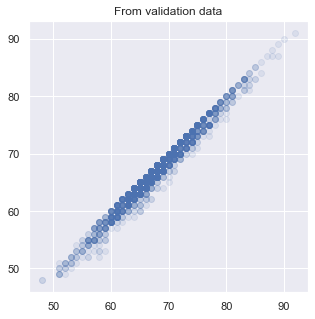

In [27]:
#pd.options.display.max_seq_items = 2000
#print(dirty_data.columns)

cheeky_validation_data = pd.read_csv('fifa21_validate.csv')

#dirty_data = fifa_file.copy()

dropped_joined_loan_date = False
dropped_id_name = False
dropped_other_cols = False
cheeky_validation_data = prep_headings(cheeky_validation_data,'joined')
cheeky_validation_data = preprocessing(cheeky_validation_data)
cheeky_validation_data = cheeky_validation_data[['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'ova']].copy()

cheeky_v_features =  cheeky_validation_data.drop(['ova'],axis=1)
cheeky_v_features['max'] = cheeky_validation_data.max(axis=1)
cheeky_v_effort = pd.concat([cheeky_v_features['max'], cheeky_validation_data['ova']], axis=1)
cheeky_v_effort

cheeky_v_features = cheeky_v_effort[['max']]
cheeky_v_target = cheeky_v_effort[['ova']]

cheek_v_predictions = cheeky_lm.predict(cheeky_v_features)

print('R2:       ' + str(r2_score(cheeky_v_target, cheek_v_predictions)))
print('MSE:      ' + str(unkind_squared_error(cheeky_v_target, cheek_v_predictions)))
print('RMSE/MAE: ' + str(np.sqrt(unkind_squared_error(cheeky_v_target, cheek_v_predictions))))

sns.set(rc = {'figure.figsize':(5,5)})
plt.title('From validation data')
plt.scatter(x=cheeky_v_features,y=cheeky_v_target, alpha=0.1)

In [28]:
correlation_pair_check(cheeky_effort)

0.9889016517932891

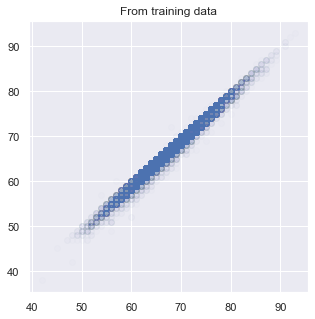

In [29]:
sns.set(rc = {'figure.figsize':(5,5)})
plt.title('From training data')
plt.scatter(x=cheeky_features,y=cheeky_target, alpha=0.01)

### Cheating: checking understanding of LM

##### Cheating - using target as feature - just to confirm we get R2 of 1 and 0 MSE - confirmed

In [30]:
# prep cheat data

cheatin_effort = cheeky_data[['ova']]
cheatin_effort = cheatin_effort.rename(columns={'ova' : 'ova_cpy'})
cheatin_effort['ova'] = cheeky_data['ova']


# comment line below after first run to keep record of results
#results = pd.DataFrame(columns=['Name','Description','Test %','Random State','R2 Train','R2 Test','RMSE Test','Min Correlation to Target','Max Correlation to Target'])

name = 'Cheating'
desc = 'Target is only Feature'
min_correlation_with_target = 0.1
max_correlation_with_other_feature=0.9
seed=42
size_of_test=0.2

# no need to filter / scale / encode.... cos we cheeky

results2, cheat_lm = choo_choo_train_model(cheatin_effort,'ova',name,desc,putout=True,seed=seed,size_of_test=size_of_test)    # choo_choo_train_model(df, target, description, size_of_test=0.2, seed=42, putout=False):
i = i + 1
results2.extend([min_correlation_with_target,max_correlation_with_other_feature])
results.loc[len(results)] = results2
results


*** Target is only Feature ***
Training/Test: 80.0% / 20.0%
Random State:  42
--- training data ---
R2:   1.0

--- test data ---
R2:       1.0
MSE:      3.323392478279243e-29
RMSE/MAE: 5.764887230709065e-15


,Name,Model Index,Description,Test %,Random State,R2 Train,R2 Test,RMSE Test,Min Correlation to Target,Max Correlation to Target
0,Baseline,0,True baseline - taking score not add score,35.0,24,0.908547,0.914378,2.047430e+00,0.1,0.9
1,Cheeky Effort,1,Only the max positional score as feature,20.0,42,0.977901,0.977957,1.021638e+00,0.1,0.9
2,Cheating,2,Target is only Feature,20.0,42,1.000000,1.000000,5.764887e-15,0.1,0.9
